# Student Depression Prediction Project

**Name:** Rohan Salwekar  
**Date:** May 7, 2025  

## 1. Introduction

In this project, we build and compare machine-learning models (Logistic Regression and Random Forest) to predict student depression status from demographic, academic, and behavioral features. We perform data cleaning, EDA, hyperparameter tuning, feature engineering, and model interpretability analyses.

## 2. Setup & Imports

Load all the Python libraries and modules needed for data handling, visualization, model building, and evaluation.

In [1]:
import os
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
)

## 3. Load & Clean Data

Load the dataset, inspect its basic structure, and prepare it for modeling.

### 3.1 Initial Data Inspection

- Read CSV into a DataFrame  
- Display head, info, summary statistics  
- Visualize the target distribution

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


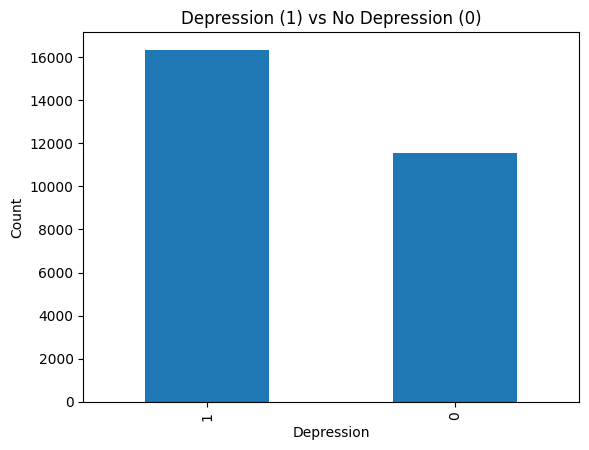

In [2]:
# Load Data & Initial Inspection
df = pd.read_csv('student_depression_dataset.csv')

display(df.head())
df.info()
display(df.describe(include='all'))

# Plot target distribution
df['Depression'].value_counts().plot.bar()
plt.title("Depression (1) vs No Depression (0)")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

### 3.2 Data Cleaning & Parsing

- Parse and impute `Sleep Duration` into numeric `Sleep_Hours`  
- Convert numeric columns and impute missing values  
- Drop the original string column and any unwanted columns

In [3]:
# Data Cleaning & Parsing

def parse_sleep(x):
    if not isinstance(x, str):
        return np.nan
    nums = re.findall(r'\d+', x)
    if len(nums) == 2:
        return (int(nums[0]) + int(nums[1])) / 2
    elif len(nums) == 1:
        return int(nums[0])
    else:
        return np.nan

# 1. Parse & impute Sleep Duration
df['Sleep_Hours'] = df['Sleep Duration'].apply(parse_sleep)
df['Sleep_Hours'].fillna(df['Sleep_Hours'].median(), inplace=True)

# 2. Convert numeric-like columns
numeric_cols = [
    'Age', 'CGPA', 'Academic Pressure', 'Work Pressure',
    'CGPA', 'Study Satisfaction', 'Job Satisfaction',
    'Work/Study Hours', 'Financial Stress'
]
for col in numeric_cols:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

# 3. Drop original string column
df.drop(columns=['Sleep Duration'], inplace=True)

/var/folders/l3/tbvkwl7n4l31whp_1_1vhflm0000gn/T/ipykernel_8220/3443159815.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep_Hours'].fillna(df['Sleep_Hours'].median(), inplace=True)
/var/folders/l3/tbvkwl7n4l31whp_1_1vhflm0000gn/T/ipykernel_8220/3443159815.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

## 4. Exploratory Data Analysis

Explore the distributions of numeric features, their correlations, and the breakdown of categorical features by depression status.

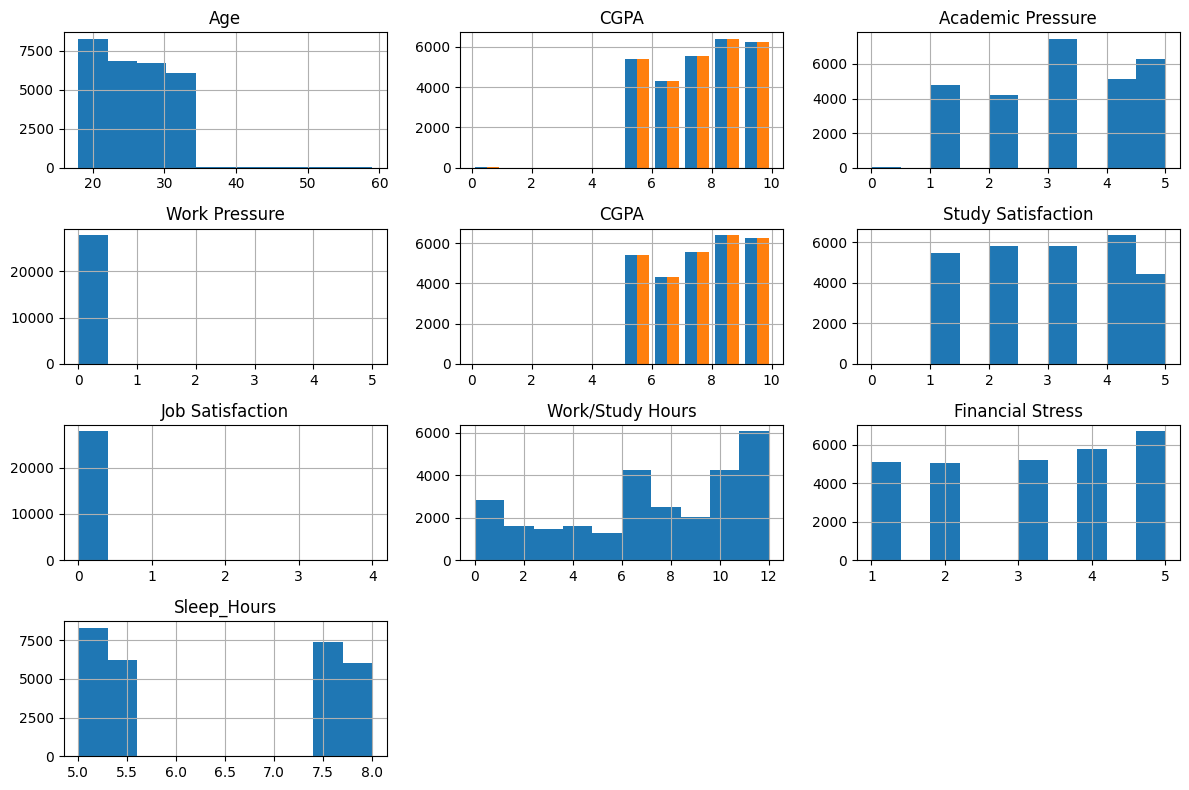

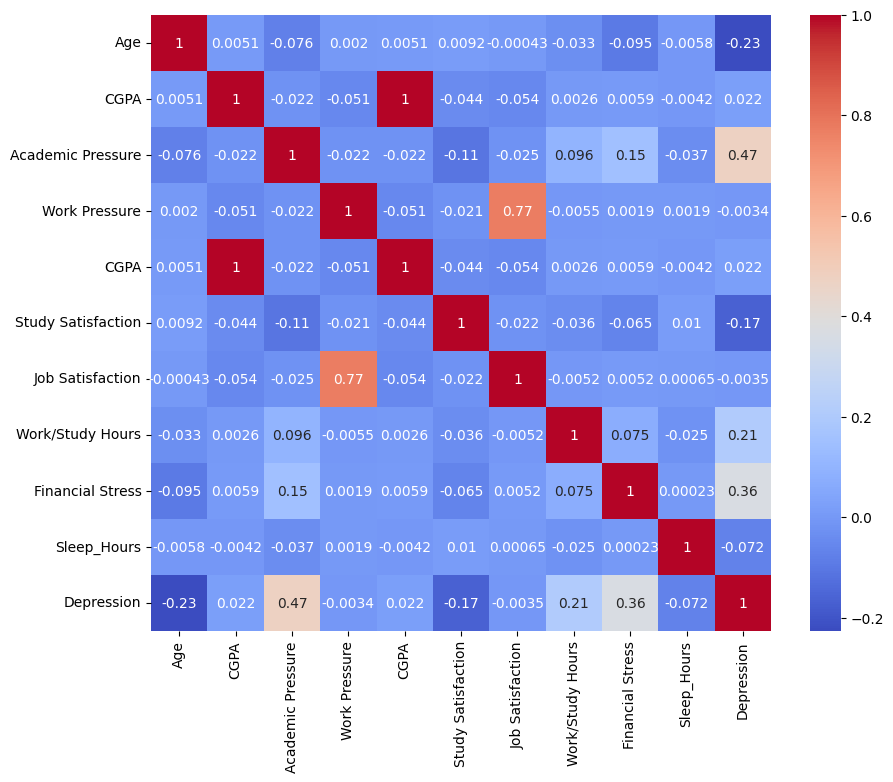

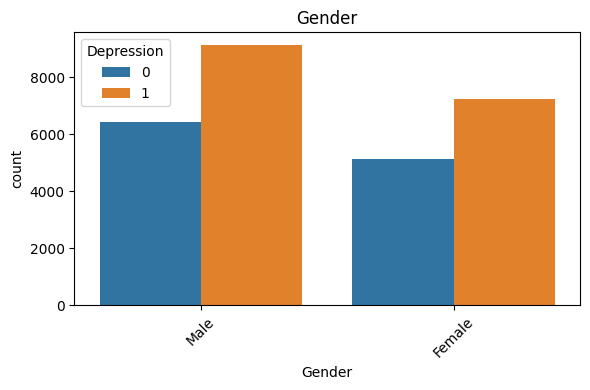

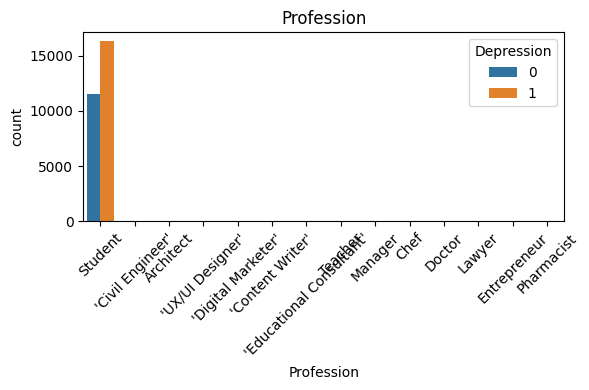

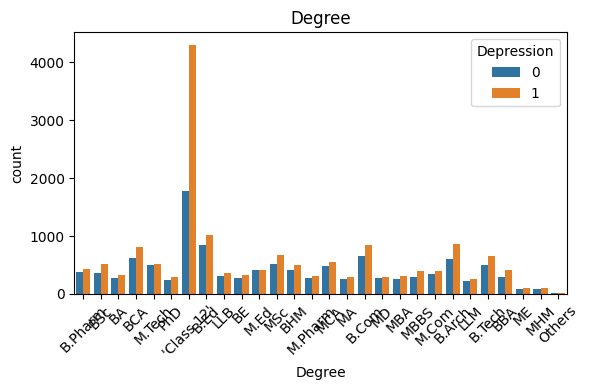

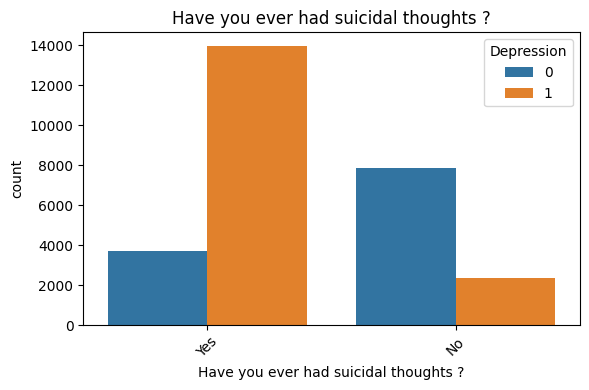

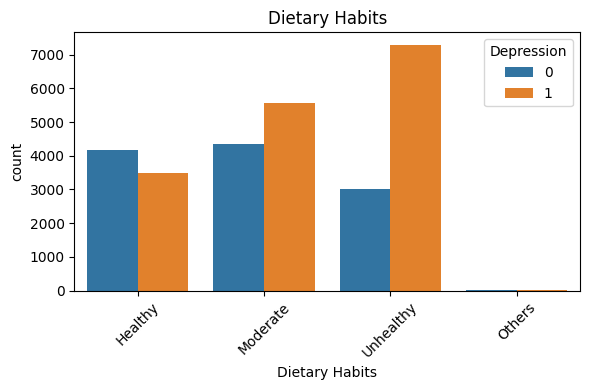

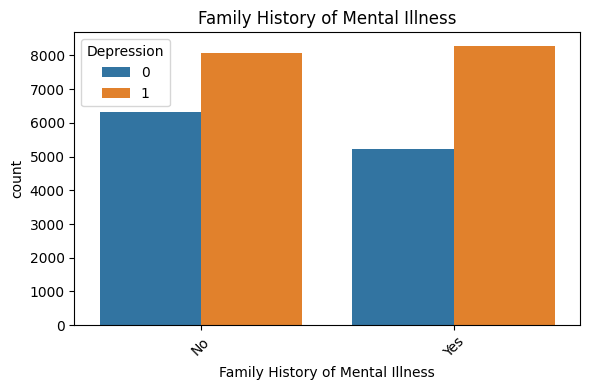

In [4]:
# Exploratory Data Analysis

# Numeric distributions
num_cols = numeric_cols + ['Sleep_Hours']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df[num_cols + ['Depression']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Categorical breakdowns
cat_cols = [
    'Gender', 'Profession', 'Degree',
    'Have you ever had suicidal thoughts ?',
    'Dietary Habits', 'Family History of Mental Illness'
]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Depression')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.tight_layout()
    plt.show()

## 5. Train/Test Split

Separate features (`X`) and target (`y`), then split into training and testing sets with stratification.

In [5]:
# Train/Test Split
X = df.drop(columns=['id','City','Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training shape:", X_train.shape, "Test shape:", X_test.shape)

Training shape: (22320, 15) Test shape: (5581, 15)


## 6. Preprocessing Pipeline Definition

Define transformers for numeric and categorical features, then combine them with a `ColumnTransformer`.

In [6]:
# Preprocessing Pipeline Definition
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

## 7. Load Saved Models

Instead of retraining, we load our pre-fitted pipelines.

In [7]:
# Add interaction terms
def add_interactions(X_df):
    X = X_df.copy()
    X['Acad_x_Work'] = X['Academic Pressure'] * X['Work Pressure']
    X['Sleep_x_Hours'] = X['Sleep_Hours'] * X['Work/Study Hours']
    return X

interaction = FunctionTransformer(add_interactions)

In [8]:
best_lr = joblib.load('models/best_lr.pkl')
best_rf = joblib.load('models/best_rf.pkl')
pipe_rf_fe  = joblib.load('models/rf_with_interactions.pkl')
pipe_rf_sel = joblib.load('models/rf_top10_features.pkl')

## 8. Evaluation Helper Function

A reusable function to print common classification metrics.

In [9]:
# Evaluation Helper Function
def eval_model(name, y_true, y_pred, y_proba=None):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1:", f1_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_true, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

## 9. Baseline Modeling & ROC Curves

Train default Logistic Regression and Random Forest, evaluate on test set, and plot ROC curves.

**This cell is commented out to avoid having to rerun the training steps every time.**

In [10]:
# # Baseline Modeling & ROC Curves

# # Logistic Regression baseline
# pipe_lr = Pipeline([
#     ('prep', preprocessor),
#     ('clf', LogisticRegression(max_iter=1000, random_state=42))
# ])
# pipe_lr.fit(X_train, y_train)
# y_pred_lr = pipe_lr.predict(X_test)
# y_proba_lr = pipe_lr.predict_proba(X_test)[:,1]
# eval_model("Logistic Regression (baseline)", y_test, y_pred_lr, y_proba_lr)

# # Random Forest baseline
# pipe_rf = Pipeline([
#     ('prep', preprocessor),
#     ('clf', RandomForestClassifier(random_state=42))
# ])
# pipe_rf.fit(X_train, y_train)
# y_pred_rf = pipe_rf.predict(X_test)
# y_proba_rf = pipe_rf.predict_proba(X_test)[:,1]
# eval_model("Random Forest (baseline)", y_test, y_pred_rf, y_proba_rf)

# # ROC curves
# plt.figure()
# RocCurveDisplay.from_estimator(pipe_lr, X_test, y_test, name='LR (baseline)')
# RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test, name='RF (baseline)')
# plt.title("ROC Curves (Baseline Models)")
# plt.show()

## 10. Hyperparameter Tuning for Both Models

Perform grid search with 5-fold CV to optimize F1 score for both classifiers.

**This cell is commented out to avoid having to rerun the training steps every time.**

In [11]:
# # Hyperparameter Tuning for Both Models

# # Logistic Regression tuning
# pipe_lr = Pipeline([
#     ('prep', preprocessor),
#     ('clf', LogisticRegression(random_state=42, max_iter=2000))
# ])
# param_grid_lr = {
#     'clf__penalty': ['l1', 'l2'],
#     'clf__C': [0.01, 0.1, 1, 10],
#     'clf__solver': ['liblinear']
# }
# grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid_lr.fit(X_train, y_train)
# print("Best LR params:", grid_lr.best_params_)
# best_lr = grid_lr.best_estimator_

# # Random Forest tuning
# param_grid_rf = {
#     'clf__n_estimators': [100, 300],
#     'clf__max_depth': [None, 10, 20],
#     'clf__min_samples_split': [2, 5]
# }
# grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid_rf.fit(X_train, y_train)
# print("Best RF params:", grid_rf.best_params_)
# best_rf = grid_rf.best_estimator_

# # Evaluate tuned models
# y_pred_lr = best_lr.predict(X_test)
# y_proba_lr = best_lr.predict_proba(X_test)[:,1]
# eval_model("Logistic Regression (tuned)", y_test, y_pred_lr, y_proba_lr)

# y_pred_rf = best_rf.predict(X_test)
# y_proba_rf = best_rf.predict_proba(X_test)[:,1]
# eval_model("Random Forest (tuned)", y_test, y_pred_rf, y_proba_rf)

## 11. Feature Engineering & Selection

1. **Interactions:** manually add pairwise interaction terms  
2. **Model-based selection:** keep top-10 features by RF importance

**This cell is commented out to avoid having to rerun the training steps every time.**

In [12]:
# # Feature Engineering & Selection

# # RF + Interactions
# pipe_rf_fe = Pipeline([
#     ('interact', interaction),
#     ('prep', preprocessor),
#     ('clf', clone(best_rf.named_steps['clf']))
# ])
# pipe_rf_fe.fit(X_train, y_train)

# # b) Model-based selection
# sel = SelectFromModel(estimator=best_rf.named_steps['clf'], max_features=10)
# pipe_rf_sel = Pipeline([
#     ('prep', preprocessor),
#     ('sel', sel),
#     ('clf', clone(best_rf.named_steps['clf']))
# ])
# pipe_rf_sel.fit(X_train, y_train)

## 12. Model Evaluation for Loaded Models

Compute key classification metrics (Accuracy, Precision, Recall, F1, ROC AUC) and the confusion matrix for each saved pipeline.

In [13]:
# Evaluate tuned Logistic Regression
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]
eval_model("Logistic Regression (loaded)", y_test, y_pred_lr, y_proba_lr)

# Evaluate tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
eval_model("Random Forest (loaded)", y_test, y_pred_rf, y_proba_rf)

# Evaluate RF with Interactions
y_pred_rf_fe = pipe_rf_fe.predict(X_test)
y_proba_rf_fe = pipe_rf_fe.predict_proba(X_test)[:,1]
eval_model("RF + Interactions", y_test, y_pred_rf_fe, y_proba_rf_fe)

# Evaluate RF with Feature Selection
y_pred_rf_sel = pipe_rf_sel.predict(X_test)
y_proba_rf_sel = pipe_rf_sel.predict_proba(X_test)[:,1]
eval_model("RF + Feature Selection", y_test, y_pred_rf_sel, y_proba_rf_sel)

--- Logistic Regression (loaded) ---
Accuracy: 0.8457265722988712
Precision: 0.8559597752144336
Recall: 0.8855569155446756
F1: 0.8705068431343059
ROC AUC: 0.9182151756793727
Confusion Matrix:
 [[1826  487]
 [ 374 2894]]
--- Random Forest (loaded) ---
Accuracy: 0.837484321806128
Precision: 0.8466960352422908
Recall: 0.8821909424724602
F1: 0.8640791248314101
ROC AUC: 0.9131830836403892
Confusion Matrix:
 [[1791  522]
 [ 385 2883]]
--- RF + Interactions ---
Accuracy: 0.837484321806128
Precision: 0.8466960352422908
Recall: 0.8821909424724602
F1: 0.8640791248314101
ROC AUC: 0.9131830836403892
Confusion Matrix:
 [[1791  522]
 [ 385 2883]]
--- RF + Feature Selection ---
Accuracy: 0.832108941049991
Precision: 0.844924533885765
Recall: 0.8736230110159119
F1: 0.8590341507446968
ROC AUC: 0.9045443083926146
Confusion Matrix:
 [[1789  524]
 [ 413 2855]]


## 13. ROC Curves for all Models

Below is the code to plot the ROC curves for the tuned LR and RF models as well as the RF variant models.

<Figure size 800x600 with 0 Axes>

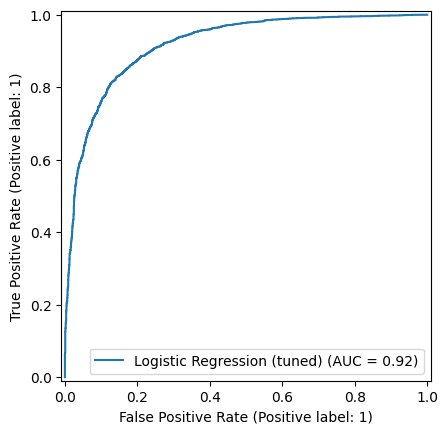

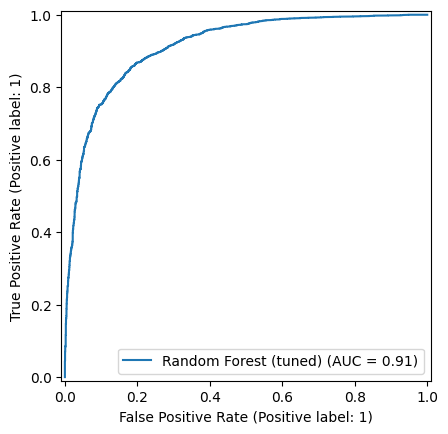

<Figure size 600x400 with 0 Axes>

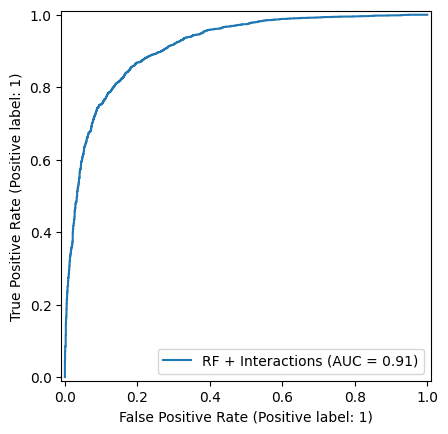

<Figure size 600x400 with 0 Axes>

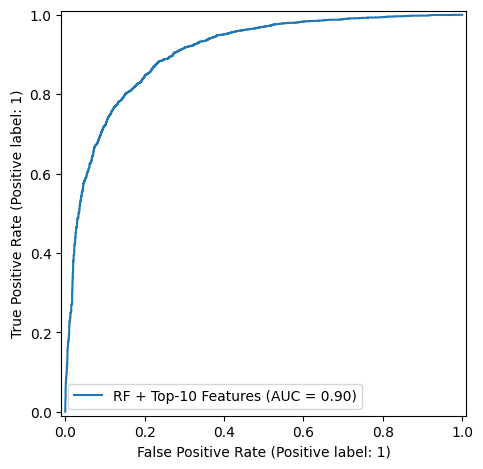

In [14]:
plt.figure(figsize=(8, 6))

# Logistic Regression
RocCurveDisplay.from_estimator(
    best_lr, X_test, y_test,
    name="Logistic Regression (tuned)"
)
# Random Forest
RocCurveDisplay.from_estimator(
    best_rf, X_test, y_test,
    name="Random Forest (tuned)"
)

# RF with Interactions
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(
    pipe_rf_fe, X_test, y_test,
    name=f"RF + Interactions"
)

# RF with Feature Selection
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(
    pipe_rf_sel, X_test, y_test,
    name=f"RF + Top-10 Features"
)

plt.legend()
plt.tight_layout()
plt.show()

## 14. Precision–Recall Curve Comparison

Plot PR curves for the tuned logistic regression and RF-selection pipelines.

<Figure size 800x600 with 0 Axes>

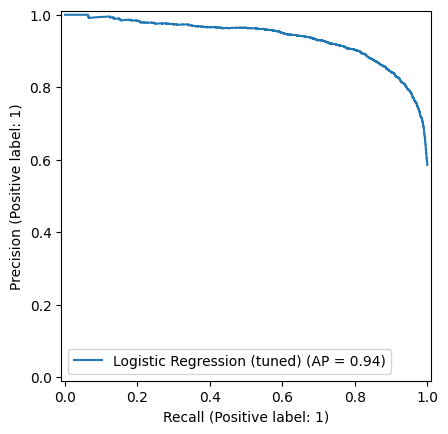

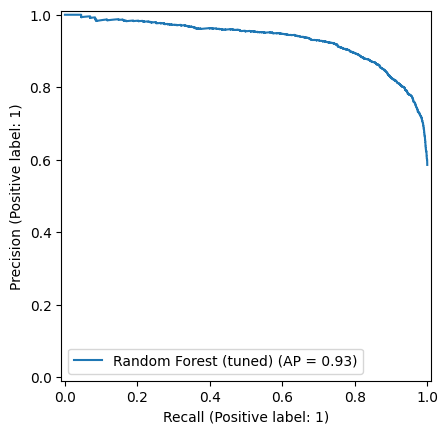

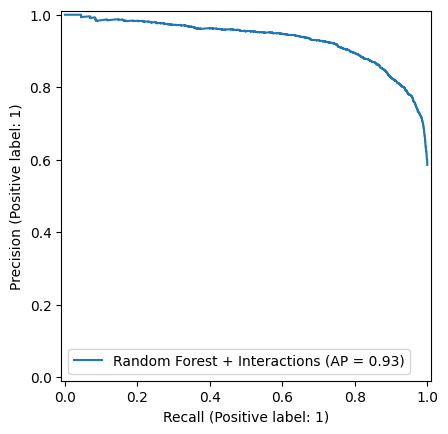

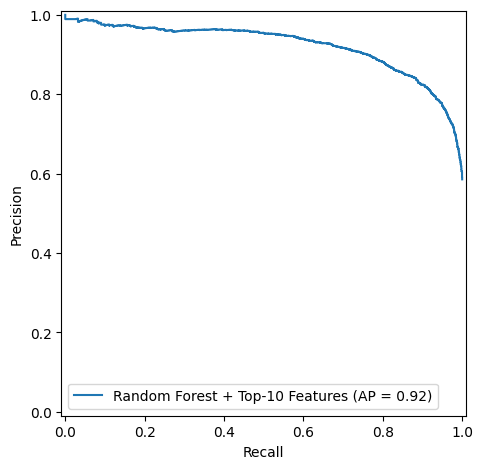

In [15]:
# Precision–Recall Curve Comparison (fixed)

plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(
    best_lr, X_test, y_test, name="Logistic Regression (tuned)"
)
PrecisionRecallDisplay.from_estimator(
    best_rf, X_test, y_test, name="Random Forest (tuned)"
)
PrecisionRecallDisplay.from_estimator(
    pipe_rf_fe, X_test, y_test, name="Random Forest + Interactions"
)
PrecisionRecallDisplay.from_estimator(
    pipe_rf_sel, X_test, y_test, name="Random Forest + Top-10 Features"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()

## 15. Model Interpretability

Extract and display the top coefficients from LR and top feature importances from RF.

In [16]:
# Feature Importance & Coefficients

prep = best_lr.named_steps['prep']
feature_names = prep.get_feature_names_out()

# Logistic Regression coefficients
coefs = best_lr.named_steps['clf'].coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)
display(coef_df.head(10))

# Random Forest feature importances
importances = best_rf.named_steps['clf'].feature_importances_
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False)
display(fi_df.head(10))

,feature,coef,abs_coef
54,cat__Have you ever had suicidal thoughts ?_Yes,1.260114,1.260114
2,num__Academic Pressure,1.068368,1.068368
53,cat__Have you ever had suicidal thoughts ?_No,-1.001517,1.001517
8,num__Financial Stress,0.740652,0.740652
0,num__Age,-0.470589,0.470589
58,cat__Dietary Habits_Unhealthy,0.458950,0.458950
7,num__Work/Study Hours,0.379337,0.379337
55,cat__Dietary Habits_Healthy,-0.342798,0.342798
5,num__Study Satisfaction,-0.277727,0.277727
9,num__Sleep_Hours,-0.131007,0.131007


,feature,importance
2,num__Academic Pressure,0.156108
54,cat__Have you ever had suicidal thoughts ?_Yes,0.149116
53,cat__Have you ever had suicidal thoughts ?_No,0.148944
8,num__Financial Stress,0.100616
0,num__Age,0.065730
7,num__Work/Study Hours,0.055050
4,num__CGPA,0.051658
1,num__CGPA,0.051112
5,num__Study Satisfaction,0.033589
9,num__Sleep_Hours,0.022906


## 16. Save Models

In [17]:
# os.makedirs('models', exist_ok=True)
# joblib.dump(best_lr, 'models/best_lr.pkl')
# joblib.dump(best_rf, 'models/best_rf.pkl')
# print("Saved tuned models to models/")
# joblib.dump(pipe_rf_fe, 'models/rf_with_interactions.pkl')
# joblib.dump(pipe_rf_sel,'models/rf_top10_features.pkl')
# print("Saved RF variant pipelines.")